In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(205, 26)

In [49]:
for columns in df :
    print("unique values of",columns)
    print(df[columns].unique())
    print("total number of unique values of",columns,"is",df[columns].nunique())

unique values of car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
total number of unique values of car_ID is 205
unique values of symboling
[ 3  1  2  0 -1 -2]
total number of unique values of symboling is 6
u

In [50]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})
df

C:\Users\final solution\AppData\Local\Temp\ipykernel_6700\2549346456.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
C:\Users\final solution\AppData\Local\Temp\ipykernel_6700\2549346456.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [51]:
numerical_columns=df.select_dtypes(include="number")
numerical_columns

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
#z_score for price
mean=df["price"].mean()
std=df["price"].std()
print("mean of price is",mean)
print("standard deviation of price is",std)

mean of price is 13276.710570731706
standard deviation of price is 7988.85233174315


In [54]:
df["z_score"]=(df.price-mean)/std
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,z_score
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.027324
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.403473
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.084279
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0.446659
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0.722042
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1.027468
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1.150765


In [55]:
outliers=df[(df.z_score<-3)|(df.z_score>3)]
outliers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,z_score
16,17,0,bmw x5,gas,std,2,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,3.509677
73,74,0,buick century special,gas,std,4,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,3.465240
74,75,1,buick regal sport coupe (turbo),gas,std,2,hardtop,rwd,front,112.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,4.021014


In [56]:
non_outlier=df[(df.z_score>-3)&(df.z_score<3)]
df=non_outlier
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,z_score
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.027324
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.403473
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.084279
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0.446659
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0.722042
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1.027468
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1.150765


In [57]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'z_score'],
      dtype='object')

In [58]:
categorical_columns=df.select_dtypes(include="object")
categorical_columns

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi


In [59]:
numerical_columns.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [60]:
categorical_columns.columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [61]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [62]:
df = pd.get_dummies(df,columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',])
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'z_score', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')


In [63]:
x=df[['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg']]
      

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 1.        , 0.        , ..., 0.34693878, 0.22222222,
        0.27027027],
       [0.00490196, 1.        , 0.        , ..., 0.34693878, 0.22222222,
        0.27027027],
       [0.00980392, 0.6       , 0.        , ..., 0.34693878, 0.16666667,
        0.24324324],
       ...,
       [0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.99509804, 0.2       , 1.        , ..., 0.26530612, 0.36111111,
        0.27027027],
       [1.        , 0.2       , 1.        , ..., 0.51020408, 0.16666667,
        0.21621622]])

In [64]:
y=df[["price"]]
y_scaled=scaler.fit_transform(y)
y_scaled

array([[0.26251959],
       [0.35669069],
       [0.35669069],
       [0.27677844],
       [0.38646192],
       [0.31751802],
       [0.39460984],
       [0.43252899],
       [0.58780946],
       [0.39928446],
       [0.35449702],
       [0.3700094 ],
       [0.49677217],
       [0.50100282],
       [0.60943278],
       [0.80357255],
       [0.99536196],
       [0.00103416],
       [0.03688499],
       [0.04565967],
       [0.01422751],
       [0.03945472],
       [0.08896898],
       [0.03481667],
       [0.04932623],
       [0.0780633 ],
       [0.1078032 ],
       [0.11917894],
       [0.24587903],
       [0.04265121],
       [0.05443435],
       [0.00880602],
       [0.04421811],
       [0.063021  ],
       [0.06822313],
       [0.06822313],
       [0.08702601],
       [0.12463178],
       [0.11679724],
       [0.16223754],
       [0.24528361],
       [0.16380445],
       [0.05224068],
       [0.11903792],
       [0.11903792],
       [0.18583516],
       [0.85026637],
       [0.953

In [65]:
#standard scaler
from sklearn.preprocessing import StandardScaler
x=numerical_columns
y=df[["price"]]
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(x)

# Transform the data
scaled_data_x = scaler.transform(x)

# Print the scaled data
print(scaled_data_x)


[[-1.72362229  1.74347043 -1.13038833 ... -0.64655303 -0.54605874
   0.02739114]
 [-1.70672403  1.74347043 -1.13038833 ... -0.64655303 -0.54605874
   0.4044611 ]
 [-1.68982577  0.133509   -1.13038833 ... -0.95301169 -0.69162706
   0.4044611 ]
 ...
 [ 1.68982577 -1.47645244  0.88465174 ... -1.10624102 -1.12833203
   1.02998314]
 [ 1.70672403 -1.47645244  0.88465174 ...  0.11959362 -0.54605874
   1.15358178]
 [ 1.72362229 -1.47645244  0.88465174 ... -0.95301169 -0.83719538
   1.17303131]]


In [66]:
#standard scaler
from sklearn.preprocessing import StandardScaler
x=numerical_columns
y=df[["price"]]
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(y)

# Transform the data
scaled_data_y= scaler.transform(y)

# Print the scaled data1`
print(scaled_data_y)


[[ 0.09104249]
 [ 0.5098994 ]
 [ 0.5098994 ]
 [ 0.15446342]
 [ 0.64231672]
 [ 0.33566607]
 [ 0.67855725]
 [ 0.84721511]
 [ 1.537876  ]
 [ 0.69934914]
 [ 0.50014233]
 [ 0.56913873]
 [ 1.13295776]
 [ 1.15177496]
 [ 1.6340528 ]
 [ 2.49755314]
 [ 3.35059949]
 [-1.07199979]
 [-0.91254145]
 [-0.87351319]
 [-1.013318  ]
 [-0.90111174]
 [-0.68088082]
 [-0.92174097]
 [-0.85720495]
 [-0.72938738]
 [-0.59710944]
 [-0.54651209]
 [ 0.01702817]
 [-0.88689431]
 [-0.83448492]
 [-1.0374319 ]
 [-0.87992497]
 [-0.79629298]
 [-0.77315479]
 [-0.77315479]
 [-0.6895228 ]
 [-0.52225881]
 [-0.55710547]
 [-0.35499482]
 [ 0.01437983]
 [-0.34802548]
 [-0.84424199]
 [-0.54713933]
 [-0.54713933]
 [-0.25003666]
 [ 2.70523926]
 [ 3.16521524]
 [ 3.22793923]
 [-1.06586677]
 [-0.94041878]
 [-0.84284812]
 [-0.85678679]
 [-0.75921613]
 [-0.26439349]
 [-0.1389455 ]
 [ 0.11195049]
 [ 0.3907238 ]
 [-0.55710547]
 [-0.6058908 ]
 [-0.31317882]
 [-0.36196415]
 [-0.28530149]
 [-0.22257749]
 [ 0.75800765]
 [ 0.76692839]
 [ 1.77162

## LINEAR REGRESSION

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model on the testing set
gb_predictions = gb_regressor.predict(x_test)

# Combine features (stacking the original features and predictions)
x_linear_regression = np.column_stack((x_test, gb_predictions))

# Build and train the multiple linear regression model on the training set
reg = LinearRegression()
reg.fit(x_linear_regression, y_test)

# Make predictions with the Linear Regression model on the testing set
pred = reg.predict(x_linear_regression)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [68]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [69]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [70]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [71]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [72]:
pred

array([[ 0.02969261],
       [ 0.90231079],
       [ 0.11101603],
       [ 0.07367404],
       [ 0.13040102],
       [-0.01097832],
       [ 0.71875543],
       [ 0.11386231],
       [ 0.05416279],
       [ 0.16724567],
       [ 0.72348114],
       [ 0.06538754],
       [ 0.20076873],
       [ 0.09263087],
       [ 0.38588129],
       [ 0.57533475],
       [ 0.23604129],
       [ 0.07390629],
       [ 0.08992694],
       [ 0.7009192 ],
       [ 0.9340183 ],
       [ 0.92288121],
       [ 0.2025441 ],
       [ 0.01234328],
       [ 0.35408948],
       [ 0.14842915],
       [ 0.1061002 ],
       [ 0.72448177],
       [ 0.82911552],
       [ 0.15209112],
       [ 0.43275525],
       [ 0.06731206],
       [ 0.23646479],
       [ 0.08201149],
       [ 0.21054553],
       [ 0.32783842],
       [ 0.08195217],
       [ 0.06809014],
       [ 0.20191448],
       [ 0.08612167],
       [ 0.19277362]])

In [73]:
print("Coefficients:", reg.coef_)


Coefficients: [[-0.01272455 -0.04396844 -0.0307806   0.10765743 -0.12756066  0.15978269
   0.07702704 -0.18619727 -1.06177432  1.46059433 -0.3790803  -0.45556993
   0.26443046 -0.08904875  0.11058424 -0.73137579  0.51621922  0.78778314]]


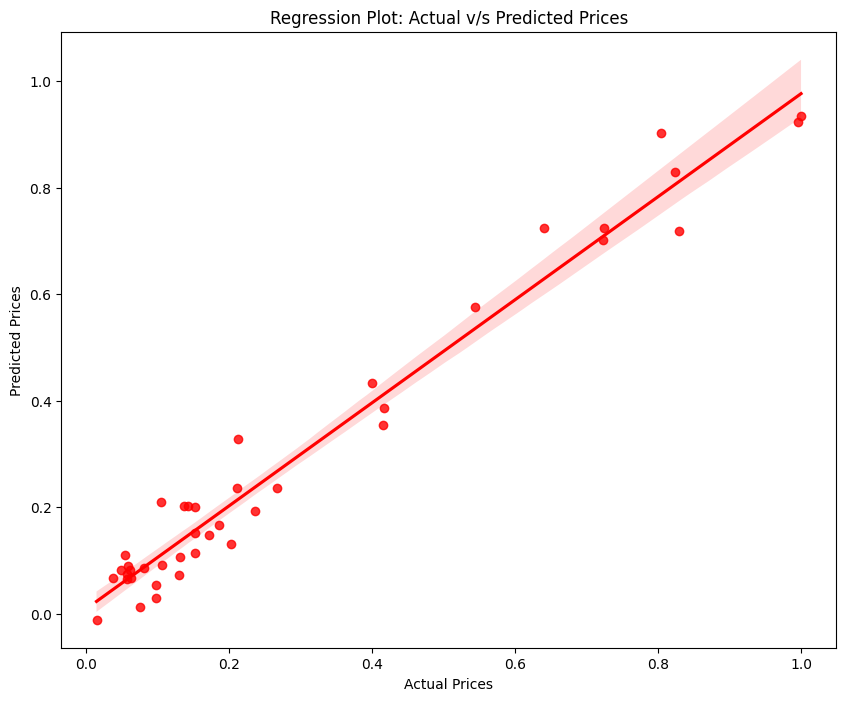

In [74]:
# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=pred,color="red")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual v/s Predicted Prices')
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score






mse=mean_squared_error(y_test,pred)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.0027763271842553283
Root Mean Squared Error (RMSE): 0.05269086433391777
Mean Absolute Error (MAE): 0.04307985011787109
R-squared (coefficient of determination): 0.9665478561508252


In [76]:
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,alfa-romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,True,True,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,True,True,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,False,False,True,False,False,False,False,False,True,False
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,False,True,False,False,False,False,True,False,False,False
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,front,109.1,188.8,68.9,55.5,2952,...,False,False,True,False,False,False,True,False,False,False
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,False,False,True,False,False,False,True,False,False,False
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,False,False,True,False,False,False,False,False,True,False
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,False,False,True,False,False,False,True,False,False,False


In [77]:
corr=numerical_columns.corr()
corr

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,0.190352,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


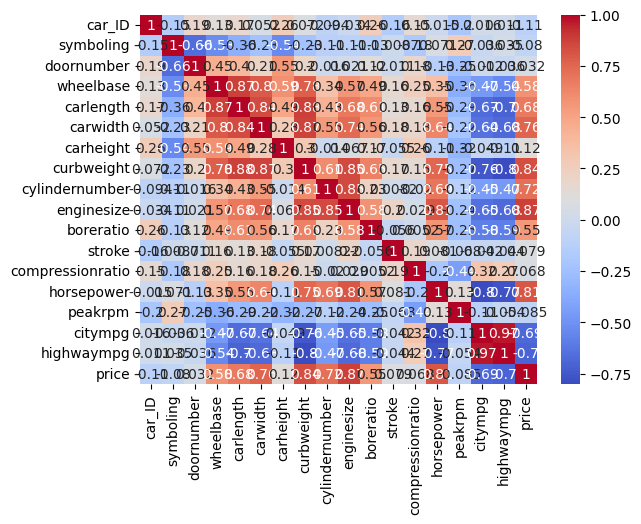

In [78]:
#heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [79]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'z_score', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

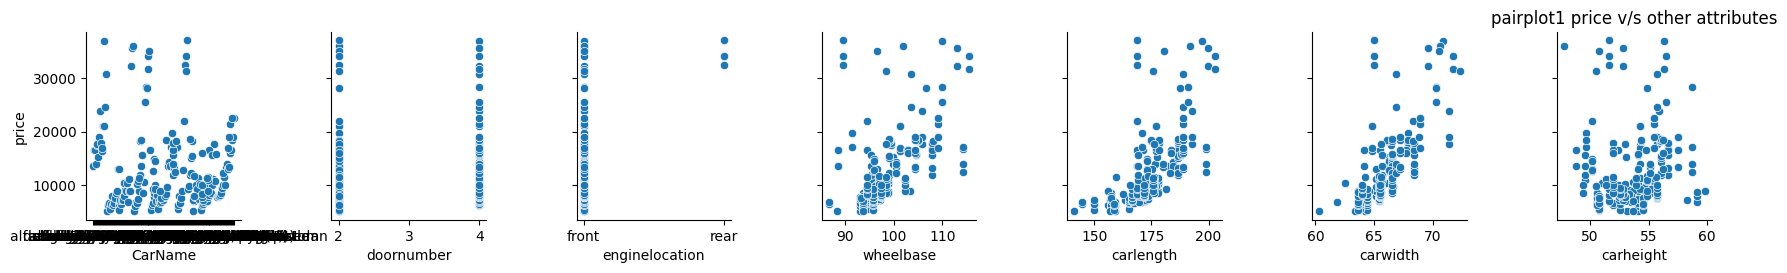

In [80]:
#pair plot
sns.pairplot(data=df,x_vars=df[['CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight']],y_vars=df[["price"]])
plt.title("pairplot1 price v/s other attributes")
plt.show()

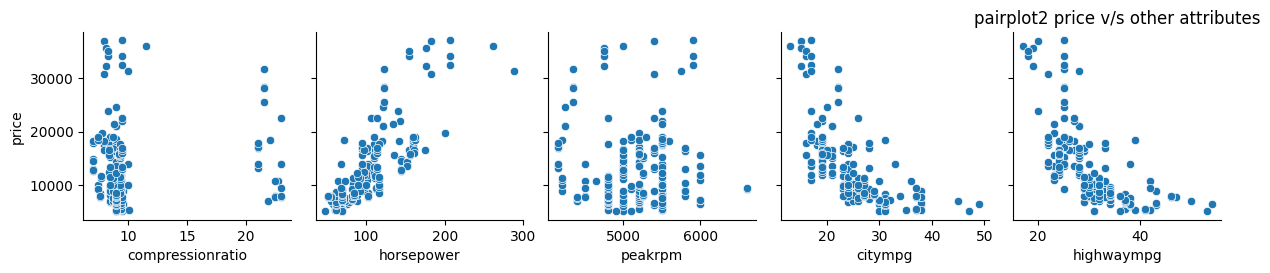

In [81]:
#pair plot
sns.pairplot(data=df,x_vars=df[['compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']],y_vars=df[["price"]])
plt.title("pairplot2 price v/s other attributes")
plt.show()

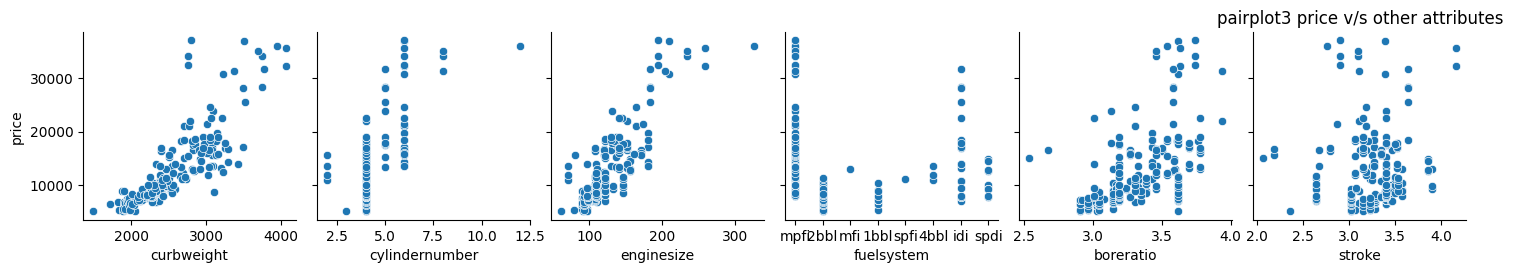

In [82]:
#pair plot
sns.pairplot(data=df,x_vars=df[['curbweight',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke']],y_vars=df[["price"]])
plt.title("pairplot3 price v/s other attributes")
plt.show()

In [83]:
#correlation btw price and other atributes of car
df[["CarName","carlength","carwidth","carheight","curbweight","enginesize","fuelsystem"]]

,CarName,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem
0,alfa-romero giulia,168.8,64.1,48.8,2548,130,mpfi
1,alfa-romero stelvio,168.8,64.1,48.8,2548,130,mpfi
2,alfa-romero Quadrifoglio,171.2,65.5,52.4,2823,152,mpfi
3,audi 100 ls,176.6,66.2,54.3,2337,109,mpfi
4,audi 100ls,176.6,66.4,54.3,2824,136,mpfi
...,...,...,...,...,...,...,...
200,volvo 145e (sw),188.8,68.9,55.5,2952,141,mpfi
201,volvo 144ea,188.8,68.8,55.5,3049,141,mpfi
202,volvo 244dl,188.8,68.9,55.5,3012,173,mpfi
203,volvo 246,188.8,68.9,55.5,3217,145,idi


## Decision Tree

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [85]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [86]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [87]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [88]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [89]:
pred_d

array([0.06735819, 0.85026637, 0.04008148, 0.10153557, 0.15236603,
       0.02179045, 0.32431448, 0.17532644, 0.09213413, 0.27260806,
       0.32431448, 0.08712003, 0.19565967, 0.09623942, 0.37859605,
       0.43644626, 0.17532644, 0.0735924 , 0.09623942, 0.32431448,
       0.90598558, 0.85026637, 0.11895957, 0.06735819, 0.41247258,
       0.11131307, 0.14105296, 0.32431448, 0.96778439, 0.14481354,
       0.50100282, 0.11903792, 0.17532644, 0.06223754, 0.19565967,
       0.32431448, 0.07973467, 0.07973467, 0.19565967, 0.08862426,
       0.27260806])

In [90]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




mse=mean_squared_error(y_test,pred_d)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_d)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_d)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.019868784544518903
Root Mean Squared Error (RMSE): 0.14095667612610233
Mean Absolute Error (MAE): 0.08167515406938171
R-squared (coefficient of determination): 0.7605997439852243


## RandomForestRegressor

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
# Create the Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model
rf_regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_r = rf_regressor.predict(x_test)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [92]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [93]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [94]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [95]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [96]:
pred_r

array([0.06631087, 0.84641272, 0.05159997, 0.09440896, 0.12729238,
       0.02637465, 0.41470918, 0.16934848, 0.09097587, 0.21987245,
       0.39485302, 0.08025697, 0.19724945, 0.12244469, 0.3945083 ,
       0.42755876, 0.19977687, 0.07497164, 0.11440238, 0.40307835,
       0.84144124, 0.86056158, 0.12645064, 0.0674707 , 0.22149702,
       0.12176058, 0.14963178, 0.40728674, 0.86746474, 0.14063679,
       0.45931338, 0.06979223, 0.19719148, 0.04924318, 0.19597681,
       0.28737512, 0.07282936, 0.08203291, 0.19581824, 0.09313272,
       0.27346067])

In [97]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_r)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_r)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.014180739947942634
Root Mean Squared Error (RMSE): 0.1190829120736583
Mean Absolute Error (MAE): 0.07216075547844167
R-squared (coefficient of determination): 0.9665478561508252


## SVM

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [100]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [101]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [102]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [103]:
pred_s

array([ 0.05509341,  0.90362855,  0.10829188,  0.02964321,  0.12358727,
       -0.02978842,  0.72951435,  0.05300873,  0.02490925,  0.28577468,
        0.72055983,  0.0446154 ,  0.19748245,  0.16004992,  0.35241768,
        0.58687662,  0.27198164,  0.01229234,  0.15888332,  0.68395276,
        0.87367412,  0.89411871,  0.23751155,  0.07818975,  0.34959336,
        0.16539898,  0.1979901 ,  0.73339844,  0.92359599,  0.15573367,
        0.49902538,  0.07057091,  0.27251237,  0.05043297,  0.20445048,
        0.33481671,  0.07146551,  0.07342405,  0.19756933,  0.10653626,
        0.33512202])

In [104]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.005083480961834277
Root Mean Squared Error (RMSE): 0.07129853407913993
Mean Absolute Error (MAE): 0.06061000172486461
R-squared (coefficient of determination): 0.938748812692466


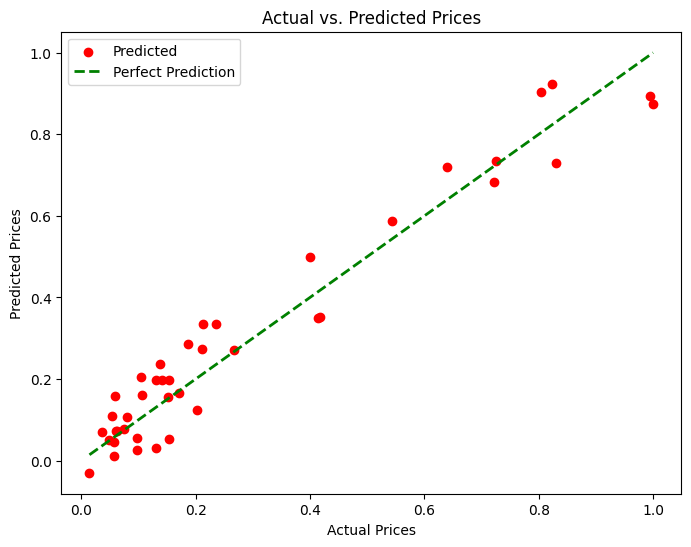

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()